In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [ ]:
df = pd.read_csv(url)
df.head(5)
# df.sample(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


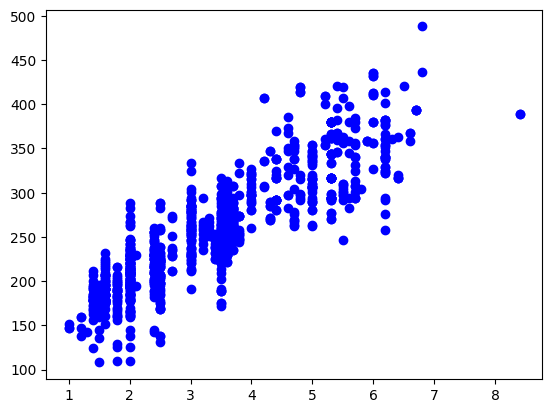

In [5]:
# Data Visualization
plt.scatter(df['ENGINESIZE'], df['CO2EMISSIONS'], color='blue')

In [13]:
# Selecting features
feature_cols = df[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
feature_cols.sample(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,CO2EMISSIONS,FUELCONSUMPTION_COMB
689,3.0,6,15.2,9.6,292,12.7
573,2.4,4,11.4,8.6,232,10.1
1028,3.6,6,14.3,9.8,283,12.3
501,3.5,6,15.2,11.3,308,13.4
1034,1.8,4,9.5,6.7,189,8.2


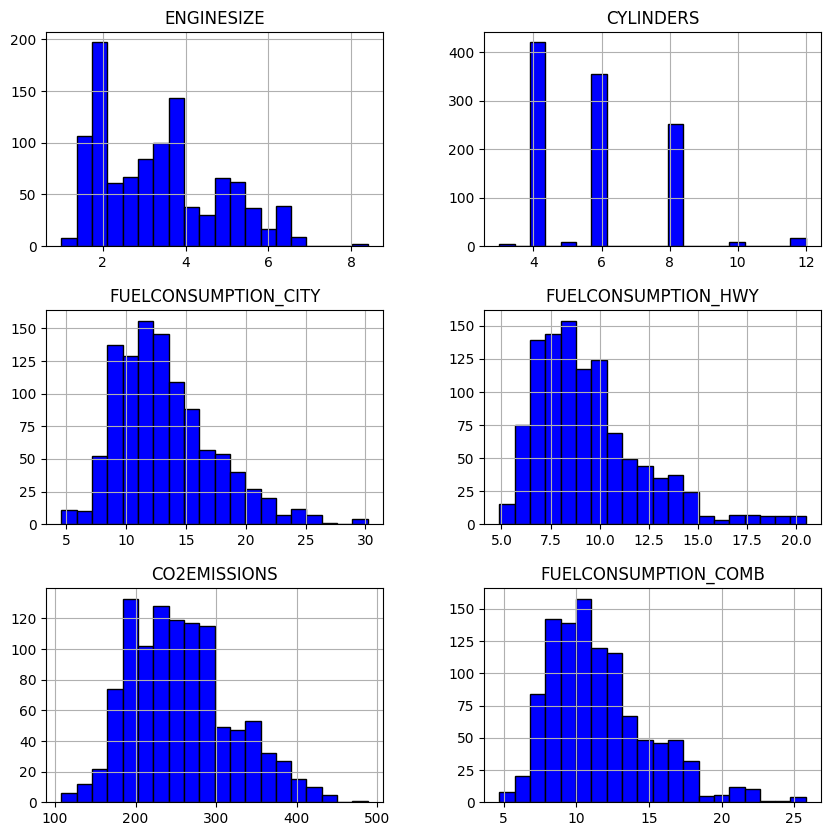

In [15]:
# Feature Visualization
visual = feature_cols[['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
visual.hist(bins=20, figsize=(10, 10), layout=(3, 2), color='blue', edgecolor='black')
plt.show()

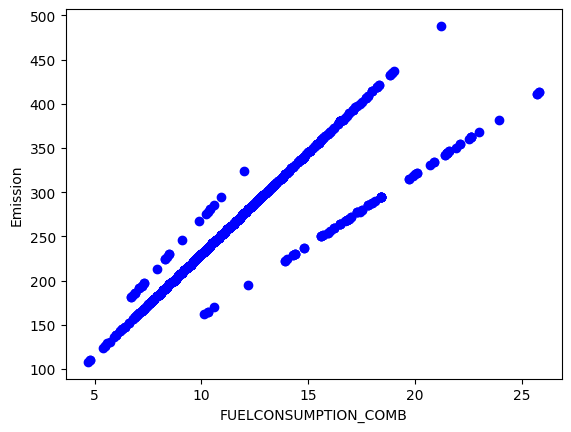

In [16]:
plt.scatter(feature_cols.FUELCONSUMPTION_COMB, feature_cols.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

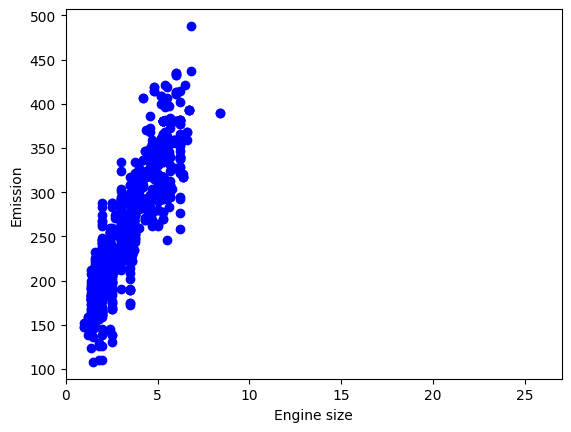

In [18]:
plt.scatter(feature_cols.ENGINESIZE, feature_cols.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

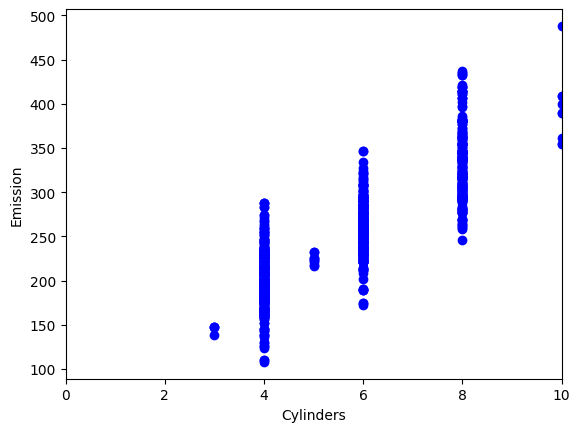

In [19]:
# Plot CYLINDERS vs CO2EMISSIONS
plt.scatter(feature_cols.CYLINDERS, feature_cols.CO2EMISSIONS,  color='blue')
plt.xlabel("Cylinders")
plt.ylabel("Emission")
plt.xlim(0, 10)
plt.show()

In [20]:
# Extract the input feature and labels from the dataset
X = feature_cols.ENGINESIZE.to_numpy().reshape(-1, 1)  # Reshape for a single feature
y = feature_cols.CO2EMISSIONS.to_numpy()


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [22]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853, 1), (853, 1))

In [23]:
# Build a simple linear regression model
from sklearn.linear_model import LinearRegression

# Create a linear regression object
Regressor = LinearRegression()
# Train the model using the training sets
Regressor.fit(X_train, y_train)
# Make predictions using the testing set
y_pred = Regressor.predict(X_test)
# Print the coefficients
print('Coefficients: ', Regressor.coef_)
print('Intercept: ', Regressor.intercept_)


Coefficients:  [38.99297872]
Intercept:  126.2897021740873


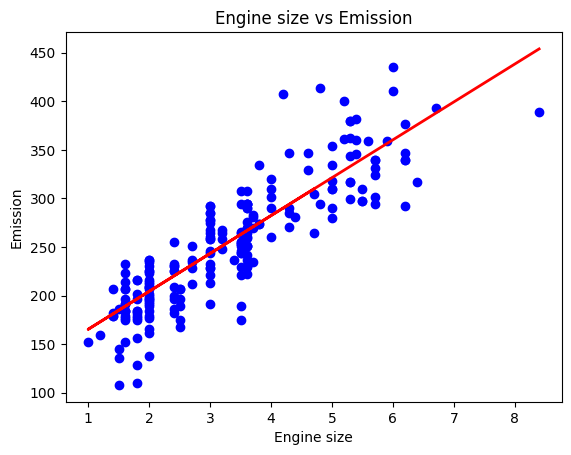

In [26]:
# Plot results
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Engine size vs Emission")
plt.show()


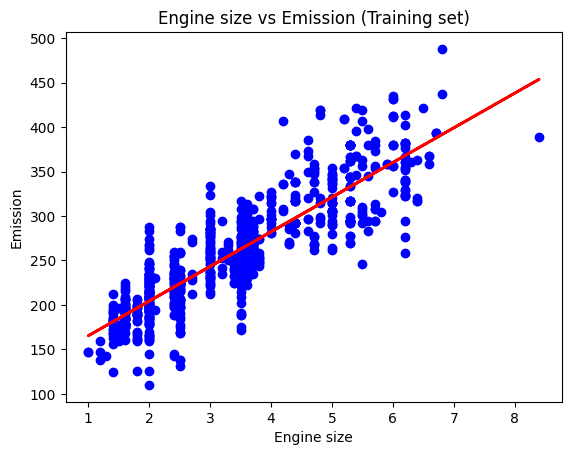

In [27]:
# Plot trainning results
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, Regressor.predict(X_train), color='red', linewidth=2)
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.title("Engine size vs Emission (Training set)")
plt.show()


In [28]:
# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 score: ", r2_score(y_test, y_pred))
print("Mean squared error: ", mean_squared_error(y_test, y_pred))  
print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("Root mean squared error: ", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 score:  0.7615595731934374
Mean squared error:  985.9381692274995
Mean absolute error:  24.097257411707837
Root mean squared error:  31.399652374309806
